Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes ci-dessous par vos réponses: 
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 


---

# TD 8 : Résolution d'équations différentielles

## Exercice 1 : Résolution d'une ED du premier ordre par la méthode d'Euler

On veut résoudre une ED du premier ordre de type y’=F(y,t).

Ecrire une fonction "Euler" avec comme arguments d'entrée:

- la fonction F(y,t),  

- t0 et tf deux réels avec t0 < tf, les bornes du domaine de définition de la variable t, 

- y0, la condition initiale de F(y,t) pour t0, 

- et n le nombre de points.

Cette fonction "Euler" retournera en sortie les tk, valeurs de la variable t, et les Yk solutions de l'ED pour chaque tk.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scp

In [15]:
def Euler(F, t0, tf, y0, n):
    h=(tf-t0)/n
    t=np.zeros(n+1)
    y=np.zeros(n+1)
    t[0]=0
    y[0]=y0
    for k in range(1,n+1):
        t[k]= t0 +k*h
        y[k]= y[k-1]+h*F(y[k-1], t[k-1])
    return t,y

Considérons l'ED (1) suivante: y′(t) + 3y(t) = 0. Ecrire la fonction F(y,t) correspondante.

In [16]:
def Fexp(y,t):
    return -3*y

En utilisant votre méthode de Euler, résoudre l'ED (1) sur un intervalle t [0,1] en utilisant n=5 en supposant la condition initiale y0=8 pour t=t0. Tracer le résultat Yk en fonction de tk sur un graphique.

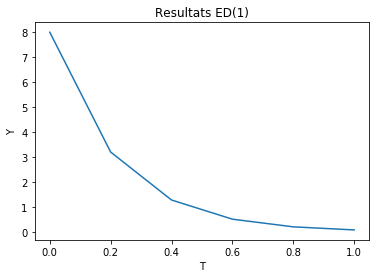

In [17]:
T,Y= Euler(Fexp, 0, 1, 8, 5)


#Tracé du graphique

fig= plt.figure()
plt.plot(T,Y)
plt.title('Resultats ED(1)')
plt.xlabel('T')
plt.ylabel('Y')
plt.show()

D'apres le cours, la solution de cette équation est bien connue. Sur le meme graphique, comparer la solution analytique de cette équation avec le résultats de votre programme, ceci pour plusieurs valeurs de n. Sur un autre graphique représenter l'erreur absolue et l'erreur relative de votre méthode pour les différentes valeurs de n.

In [31]:
def Solu(t,t0,y0):
    return y0*np.exp(-3*t0)*np.exp(-3*t)


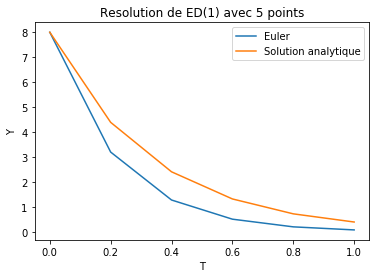

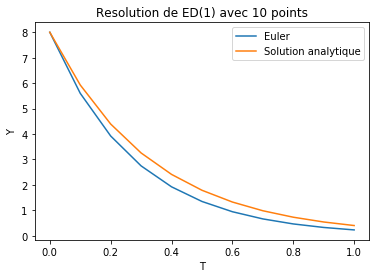

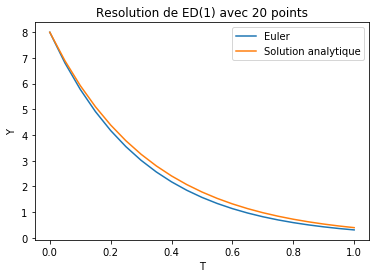

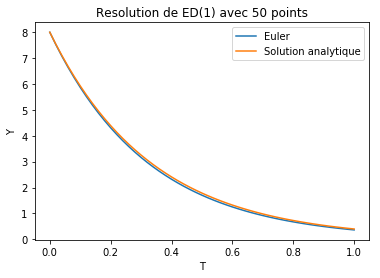

In [82]:
t0= 0
tf= 1
y0= 8

for n in [5, 10, 20, 50]:
    T,Y= Euler(Fexp, t0, tf, y0, n)
    Yth= Solu(T, t0, y0)
    Abs= np.abs(Yth-Y)
    Rela= Abs/Yth 
#Tracé du graphique

    fig= plt.figure()
    plt.plot(T,Y, label='Euler')
    plt.plot(T,Yth, label= 'Solution analytique')
    plt.title('Resolution de ED(1) avec '+str(n) +' points')
    plt.legend()
    plt.xlabel('T')
    plt.ylabel('Y')

plt.show()

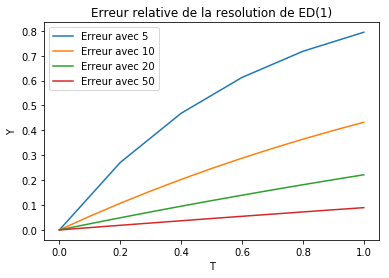

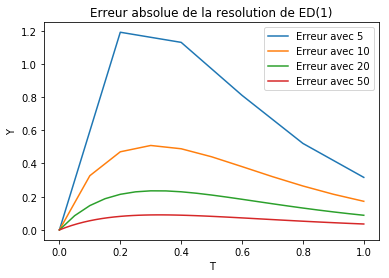

In [80]:
fig= plt.figure()

for n in [5, 10, 20, 50]:
    T,Y= Euler(Fexp, t0, tf, y0, n)
    Yth= Solu(T, t0, y0)
    Abs= np.abs(Yth-Y)
    Rela= Abs/Yth 
    
#Tracé du graphique
    plt.plot(T,Rela, label='Erreur avec ' +str(n))
plt.title('Erreur relative de la resolution de ED(1)')
plt.legend()
plt.xlabel('T')
plt.ylabel('Y')
plt.show()
    
fig= plt.figure()

for n in [5, 10, 20, 50]:
    T,Y= Euler(Fexp, t0, tf, y0, n)
    Yth= Solu(T, t0, y0)
    Abs= np.abs(Yth-Y)

#Tracé du graphique
    plt.plot(T,Abs, label= 'Erreur avec ' +str(n))
plt.title('Erreur absolue de la resolution de ED(1)')
plt.legend()
plt.xlabel('T')
plt.ylabel('Y')
plt.show()

Utiliser la fonction odeint pour resoudre la même ED. Comparer les resultats (calculs erreurs relatives) avec les résultats analytiques précédents pour quelques valeurs de n.

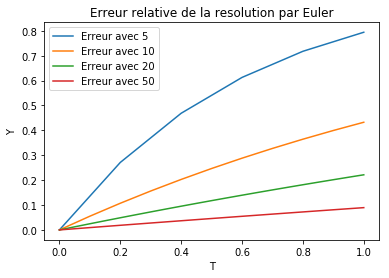

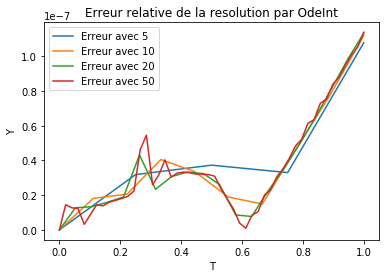

In [79]:


fig= plt.figure()

for n in [5, 10, 20, 50]:
    T,Y= Euler(Fexp, t0, tf, y0, n)
    Yth= Solu(T, t0, y0)
    RelaE= np.abs(Yth-Y)/Yth 
    
#Tracé du graphique
    plt.plot(T,RelaE, label='Erreur avec ' +str(n))
plt.title('Erreur relative de la resolution par Euler')
plt.legend()
plt.xlabel('T')
plt.ylabel('Y')
plt.show()

fig= plt.figure()

for n in [5, 10, 20, 50]:
    temps=np.linspace(t0,tf,n)
    Yth= Solu(temps, t0, y0)
    Yod=scp.odeint(Fexp, y0, temps)
    RelaO= np.abs(Yth-Yod[:,0])/Yth 
    
#Tracé du graphique
    plt.plot(temps,RelaO, label='Erreur avec ' +str(n))
plt.title('Erreur relative de la resolution par OdeInt')
plt.legend()
plt.xlabel('T')
plt.ylabel('Y')
plt.show()

## Exercice 2: Résolution de systèmes de ED

Nous avons un système d'équations différentielles de type:

x′(t) = A x(t)+B y(t)

y′(t) = C x(t)+D y(t)

Pour résoudre cela nous allons vectorialiser notre système en posant Z(t) = (x(t), y(t)) donc

Z′(t) = (x′(t), y′(t)) = (A x(t)+B y(t), C x(t)+D y(t))

Le système linéaire s’écrit donc sous la forme Z′(t) = F(Z(t),t)

avec F((x,y),t) = (Ax+By, Cx+Dy)

Ecrire la fonction définissant F(Z,t) avec Z=[x,y]. On pourra prendre par exemple A=1, B=-1, C=1, D=1.


In [54]:
def Fred(Z,t, A=1, B=-1, C=1, D=1):
    return np.array([A*Z[0] + B*Z[1], C*Z[0] + D*Z[1]])
    

En prenant t dans l'intervalle [0,1] échantilloné sur 100 points, nous allons maintenant résoudre le système avec odeint. Attention (voir aide sur la fonction): la syntaxe reste la même que pour l'exercice précédent mais il va falloir faire passer les deux conditions initiales x0 et y0 pour t=t0. On pourra utiliser

sol = odeint(F,[x0,y0],t)

Le deuxième argument correspond donc au couple [x0,y0], condition initiales de Z=[x,y]. Résoudre ce système et tracer la variable sol (attention array avec eux colonnes) en fonction de t. Qu'avez vous représenté ?



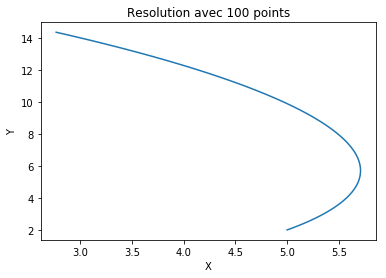

In [61]:
Z0=[5,2]
t= np.linspace(0,1,100)
sol = scp.odeint(Fred, Z0, t)
X=sol[:,0]
Y=sol[:,1]

fig= plt.figure()
plt.plot(X,Y)
plt.title('Resolution avec 100 points')
#plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

plt.show()


YOUR ANSWER HERE

Représenter sur un même graphique les trajectoires (x(t),y(t)) correspondant à différentes conditions initiales (x0,1) jusqu'à un temps tmax = 5. Que remarque-t-on ? 

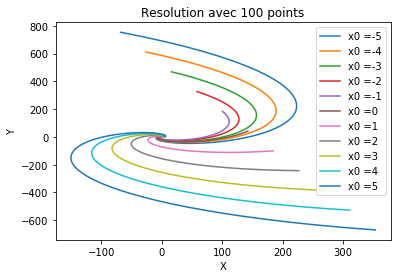

In [78]:
fig=plt.figure()

for x0 in np.arange(-5,6):
    Z0=[x0,1]
    t= np.linspace(0,5,100)
    sol = scp.odeint(Fred, Z0, t)
    X=sol[:,0]
    Y=sol[:,1]

    plt.plot(X,Y, label= 'x0 ='+str(x0))
plt.title('Resolution avec 100 points')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

## Exercice 3: Application à la reproduction des lapins

Alfred James Lotka en 1925 puis Vito Volterra en 1926 ont proposé de décrire les interactions entre proie et prédateur par les deux équations différentielles couplées suivantes :

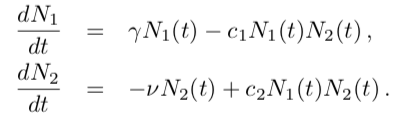

La population N1 constitue la proie (lapins), se reproduisant avec un taux de naissance γ, alors que la population de prédateurs N2 (renards) présente un taux d’extinction ν en l’absence de proie. c1 représente la prédation de N1 par N2, et c2 son efficacité pour la croissance des prédateurs.

Écrire le système différentiel précédent sous la forme matricielle : Z′(t) = F(Z(t),t), où Z est un vecteur contenant les deux populations N1 et N2.

Résoudre ce système par une intégration numérique à l’aide de la fonction odeint, dans l’intervalle de temps t ∈ [0, 20]. Vous prendrez γ=2/3, c1 =4/3, ν=1 et c2 =1,et pour conditions initiales N1(t=0)=1, N2(t=0)=4/3.


In [66]:
def Wabit(N,t, ga=2/3, nu=1, c1=4/3, c2=1):
    return np.array([ga*N[0]-c1*N[0]*N[1], -nu*N[1]+c2*N[0]*N[1]])

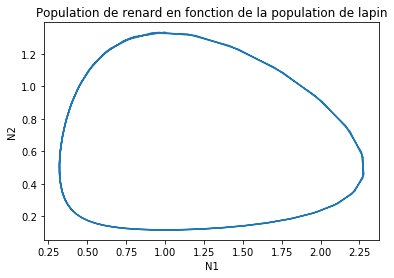

In [71]:
N0=[1,4/3]
t= np.linspace(0,20,100)
sol = scp.odeint(Wabit, N0, t)
X=sol[:,0]
Y=sol[:,1]

fig= plt.figure()
plt.plot(X,Y)
plt.title('Population de renard en fonction de la population de lapin')
#plt.legend()
plt.xlabel('N1')
plt.ylabel('N2')

plt.show()


Représenter les valeurs de population de N2 en fonction de celle de N1 pour plusieurs conditions initiales. Que remarque-t-on ?

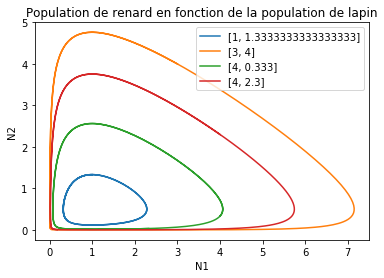

In [83]:
n0=[[1,4/3],[3,4],[4,0.333],[4,2.3]]
t= np.linspace(0,20,1000)

fig= plt.figure()
for N0 in n0 :

    sol = scp.odeint(Wabit, N0, t)
    X=sol[:,0]
    Y=sol[:,1]

    plt.plot(X,Y, label= str(N0))
plt.title('Population de renard en fonction de la population de lapin')
plt.legend()
plt.xlabel('N1')
plt.ylabel('N2')

plt.show()


Expliquer les résultats obtenus.

YOUR ANSWER HERE

## Exercice 4 : Résolution d'ED d'ordre supérieur

On souhaite étudier la dynamique d’un pendule de masse m = 50 g, fixé au bout d’une tige rigide de longueur l = 1 m, sans masse qui pivote autour de l’axe Oy en O. Le pendule est soumis à la pesanteur g = 9,81 m/s2. On suppose donc que sa trajectoire reste plane, dans le plan xOz. On repère la position du pendule par son angle θ fait avec la verticale. En appliquant le théorème du moment cinétique selon Oy, on obtient l’équation de Newton suivante:

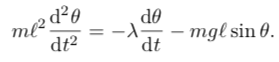

Le pendule est lancé au temps initial t = 0 depuis un angle θ=0.5 rad avec une vitesse angulaire initiale égale à 0. En suposant qu'il n'y a pas de frottements, ré-écrire l'équation plus simplement. En faisant une réduction d'odre on a un systeme d'ED tel que X(t) = (θ(t), θ′(t)).

Comment peut on exprimer X'(t) = (θ′(t),θ′′(t))? En déduire le système X′(t) = F(X(t),t) et le résoudre numériquement sur [0, 4π].


λ=0

θ′′ =−g sinθ / l

Donc X'(t) = (θ′(t), θ′′(t)) = (θ′(t), -g/l sinθ(t))



In [85]:
def Pendu(Theta,t):
    return np.array([Theta[1], -9.81*np.sin(Theta[0])])

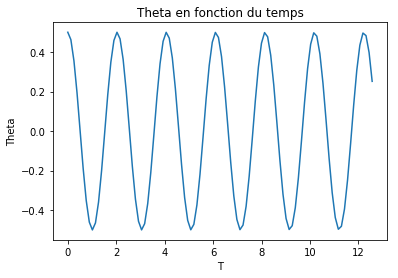

In [90]:
Theta0=[0.5,0]
t= np.linspace(0,4*np.pi,100)
sol = scp.odeint(Pendu, Theta0, t)
Tsol=sol[:,0]
Tpsol=sol[:,1]

fig= plt.figure()
plt.plot(t,Tsol)
plt.title('Theta en fonction du temps')
plt.xlabel('T')
plt.ylabel('Theta')

plt.show()



Tracer sur un même graphique l’énergie cinétique, l’énergie potentielle de pesanteur et l’énergie mécanique totale.

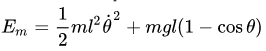

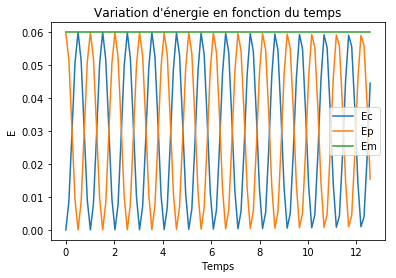

In [93]:
def Ec(Thetap, m= 0.05, l=1):
    return 0.5*m*l**2*Thetap**2
def Ep(Theta, m= 0.05, l=1):
    return 9.81*m*l*(1-np.cos(Theta))
def Em(Theta,Thetap):
    return Ec(Thetap)+Ep(Theta)

ec=Ec(Tpsol)
ep=Ep(Tsol)
em=Em(Tsol,Tpsol)

fig= plt.figure()
plt.plot(t,ec, label='Ec')
plt.plot(t,ep, label='Ep')
plt.plot(t,em, label='Em')
plt.title("Variation d'énergie en fonction du temps")
plt.legend()
plt.xlabel('Temps')
plt.ylabel('E')

plt.show()


Tracer le diagramme de phase du système. On prendra des conditions initiales de la forme $\theta_0=0$, $\dot{\theta} = \omega$ pour $\omega$ entre -7.5 et 7.5 et on limitera la taille de la fenêtre des abscisses pour voir quelque chose ! Que remarque-t-on ? À quel régime correspondent les différentes trajectoires ?

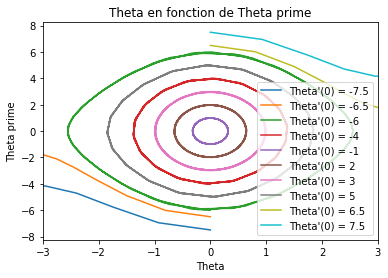

In [112]:
fig= plt.figure()

for w in [-7.5,-6.5,-6,-4,-1,2,3,5,6.5,7.5]:
    Theta0=[0,w]
    t= np.linspace(0,4*np.pi,100)
    sol = scp.odeint(Pendu, Theta0, t)
    Tsol=sol[:,0]
    Tpsol=sol[:,1]


    plt.plot(Tsol, Tpsol, label="Theta'(0) = "+str(w))
plt.title('Theta en fonction de Theta prime')
plt.legend()
plt.xlabel('Theta')
plt.ylabel('Theta prime')
plt.xlim(-3,3)

plt.show()


Faire la même chose mais avec $\lambda = 0.5$

In [117]:
def PenduF(Theta,t, m=0.05, l=1, lamb=0.5):
    return np.array([Theta[1], -lamb*Theta[1]/(m*l**2) -9.81*l*np.sin(Theta[0])])

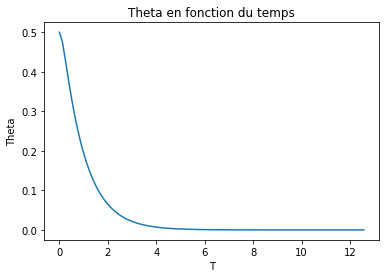

In [118]:
Theta0=[0.5,0]
t= np.linspace(0,4*np.pi,100)
sol = scp.odeint(PenduF, Theta0, t)
Tsol=sol[:,0]
Tpsol=sol[:,1]

fig= plt.figure()
plt.plot(t,Tsol)
plt.title('Theta en fonction du temps')
plt.xlabel('T')
plt.ylabel('Theta')

plt.show()



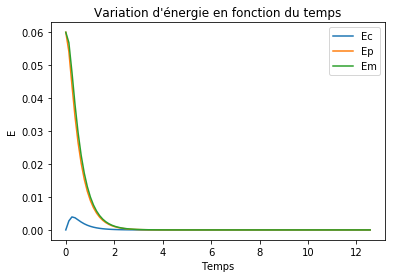

In [119]:
def Ec(Thetap, m= 0.05, l=1):
    return 0.5*m*l**2*Thetap**2
def Ep(Theta, m= 0.05, l=1):
    return 9.81*m*l*(1-np.cos(Theta))
def Em(Theta,Thetap):
    return Ec(Thetap)+Ep(Theta)

ec=Ec(Tpsol)
ep=Ep(Tsol)
em=Em(Tsol,Tpsol)

fig= plt.figure()
plt.plot(t,ec, label='Ec')
plt.plot(t,ep, label='Ep')
plt.plot(t,em, label='Em')
plt.title("Variation d'énergie en fonction du temps")
plt.legend()
plt.xlabel('Temps')
plt.ylabel('E')

plt.show()


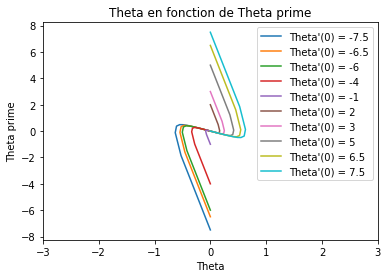

In [123]:
fig= plt.figure()

for w in [-7.5,-6.5,-6,-4,-1,2,3,5,6.5,7.5]:
    Theta0=[0,w]
    t= np.linspace(0,4*np.pi,100)
    sol = scp.odeint(PenduF, Theta0, t)
    Tsol=sol[:,0]
    Tpsol=sol[:,1]


    plt.plot(Tsol, Tpsol, label="Theta'(0) = "+str(w))
plt.title('Theta en fonction de Theta prime')
plt.legend()
plt.xlabel('Theta')
plt.ylabel('Theta prime')
plt.xlim(-3,3)

plt.show()